In [17]:
import numpy as np
import scipy.stats

In [2]:
import pystan
print pystan.__version__

2.9.0.0


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [38]:
def compile_run_and_plot(model, analytic = None, model_repaired = None):
    sm = pystan.StanModel(model_code=model)
    fit = sm.sampling(data={},
                      iter=30000,
                      warmup=15000,
                      chains=32)
    plt.figure(1, figsize=(.75*21., .75*9.))
    sns.distplot(fit.extract()['ret'], bins=200, norm_hist=True, kde=False)
    if analytic:
        plt.plot(analytic[0], analytic[1])
    if model_repaired:
        sm = pystan.StanModel(model_code=model_repaired)
        fit_repaired = sm.sampling(data={},
                                   iter=30000,
                                   warmup=15000,
                                   chains=32)
        sns.distplot(fit_repaired.extract()['ret'], bins=200, norm_hist=True, kde=False)

# Example 1
see Figure 2

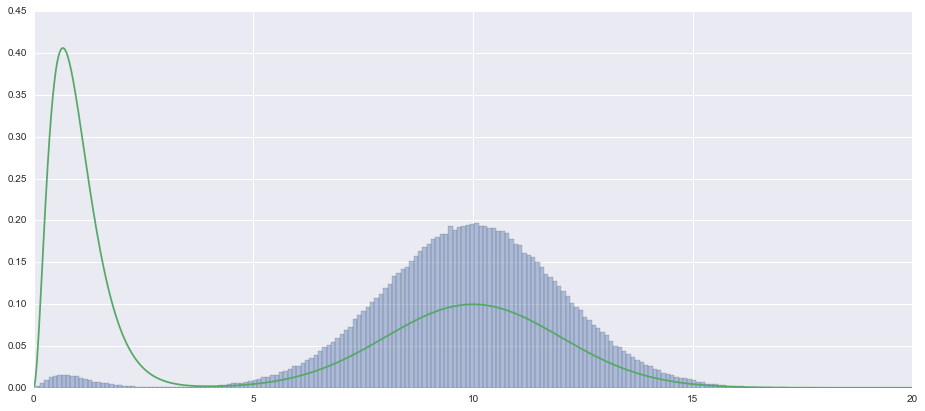

In [39]:
example_1 = """
parameters {
    real x;
    real y;
}
transformed parameters {
    real ret;
    ret <- y;
}
model {
    x ~ normal(0, 1);
    if (x > 0) {
        y ~ normal(10, 2);
    } else {
        y ~ gamma(3, 3);
    }
}
"""
analytic_1 = (
    lambda x: (
        x,
        0.5 * scipy.stats.norm.pdf(x, loc=10, scale=2) + \
        0.5 * scipy.stats.gamma.pdf(x, a=3, loc=0, scale=1./3)
    )
)(np.linspace(0, 20, 1000))
compile_run_and_plot(example_1, analytic_1)

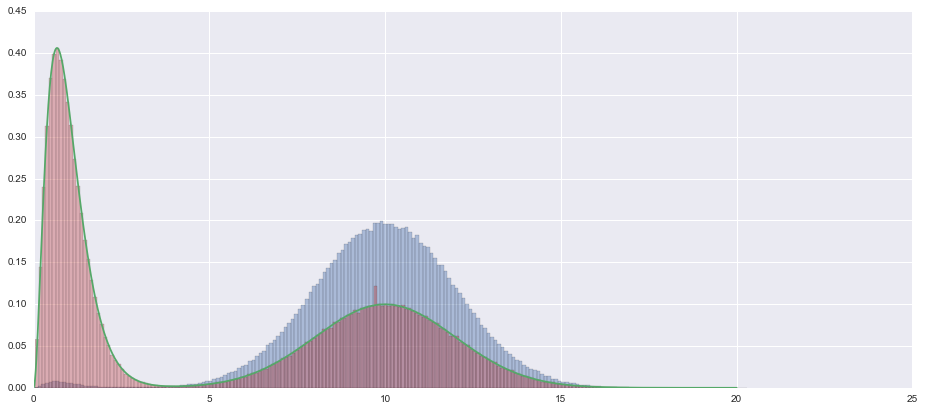

In [40]:
example_1_repaired = """
parameters {
    real x;
    real y;
    real z;
}
transformed parameters {
    real ret;
    if (x > 0) {
      ret <- y;
    } else {
      ret <- z;
    }
}
model {
    x ~ normal(0, 1);
    y ~ normal(10, 2);
    z ~ gamma(3, 3);
}
"""
compile_run_and_plot(example_1, analytic_1, example_1_repaired)

# Example 2
see Figure 3

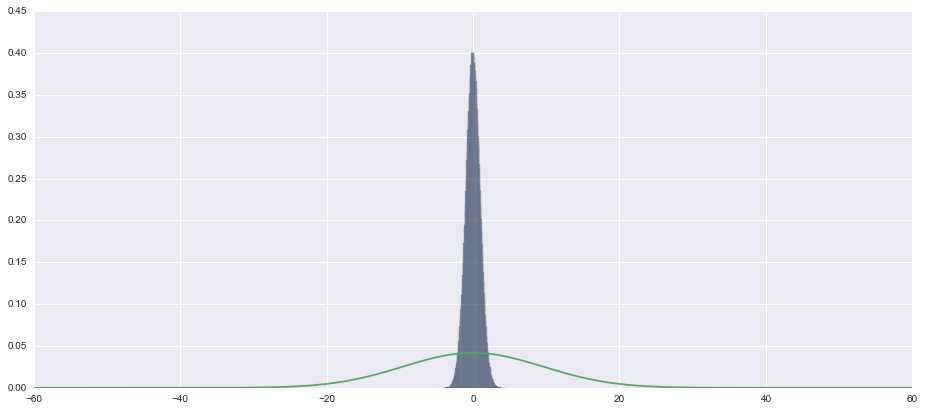

In [41]:
example_2 = """
parameters {
    real x;
}
transformed parameters {
    real ret;
    ret <- x;
}
model {
    x ~ normal(0, 1);
    for (n in 1:10) {
        x ~ normal(x, 3);
    }
}
"""
analytic_2 = (
    lambda x: (
        x,
        scipy.stats.norm.pdf(x, loc=0, scale=np.sqrt(1 + 10*9))
    )
)(np.linspace(-60, 60, 1000))
compile_run_and_plot(example_2, analytic_2)

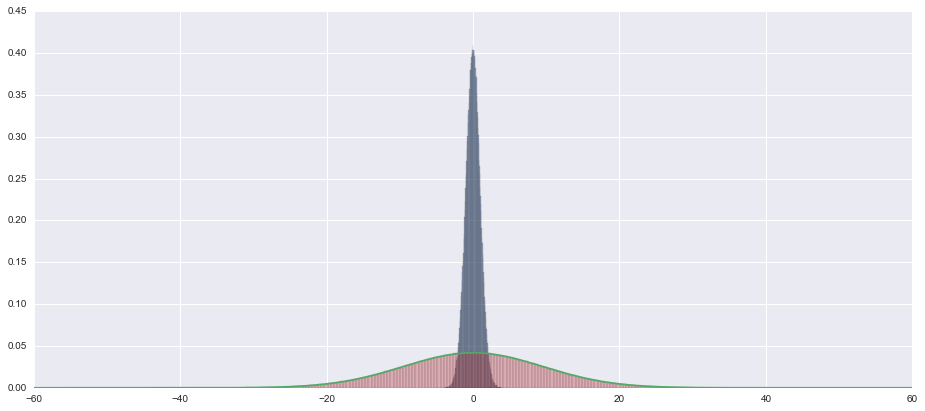

In [42]:
example_2_repaired = """
parameters {
    real x0;
    real x1;
    real x2;
    real x3;
    real x4;
    real x5;
    real x6;
    real x7;
    real x8;
    real x9;
    real x10;
}
transformed parameters {
    real ret;
    ret <- x10;
}
model {
    x0 ~ normal(0, 1);
    x1 ~ normal(x0, 3);
    x2 ~ normal(x1, 3);
    x3 ~ normal(x2, 3);
    x4 ~ normal(x3, 3);
    x5 ~ normal(x4, 3);
    x6 ~ normal(x5, 3);
    x7 ~ normal(x6, 3);
    x8 ~ normal(x7, 3);
    x9 ~ normal(x8, 3);
    x10 ~ normal(x9, 3);
}
"""
compile_run_and_plot(example_2, analytic_2, example_2_repaired)